In [25]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

### Directions:
1) Install the Quandl library and register for a Quandl account as described in the Exercise.
2) Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.


In [26]:
### Create datapath to Final Project Folder - Data
datapath = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 6/Final Project/Data'

In [27]:
# IMPORTING DATASET OF HOME PRICES ONLY
df = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'house_priceONLY.pkl'))

In [28]:
df.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
0,Abington,2021,500000,house_price,Plymouth,NaN,73,5798,78395
1,Abington,2020,432750,house_price,Plymouth,NaN,73,5798,78395
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395


### I'm using my default dataset, as I want to explore possible trends in home value in a target municipality.

3) Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
4) In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
5) Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.


### First, I'll subset data to only relevant years for Avon.

In [29]:
df_Avon = df.loc[(df['Town'] == 'Avon')]

In [30]:
df_Avon.shape

(7, 9)

In [31]:
df_Avon.head(7)

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
49,Avon,2021,450000,house_price,Norfolk,NaN,82,1660,73194
50,Avon,2020,375000,house_price,Norfolk,NaN,82,1660,73194
51,Avon,2019,362500,house_price,Norfolk,4549.0,82,1660,73194
52,Avon,2018,349500,house_price,Norfolk,4505.0,82,1660,73194
53,Avon,2016,312000,house_price,Norfolk,4482.0,82,1660,73194
54,Avon,2015,262000,house_price,Norfolk,4459.0,82,1660,73194
55,Avon,2014,272449,house_price,Norfolk,4461.0,82,1660,73194


### This is leftover reference from my screwups

In [78]:
from datetime import datetime

df_Avon['Year'] = pd.to_datetime(df_Avon['Year']) # Create a datetime column from "Year.""

In [79]:
df_Avon.head()

,Year,Value
49,1970-01-01 00:00:00.000002021,450000
50,1970-01-01 00:00:00.000002020,375000
51,1970-01-01 00:00:00.000002019,362500
52,1970-01-01 00:00:00.000002018,349500
53,1970-01-01 00:00:00.000002016,312000


### I think I need to add arbitrary date info for this method to work. I'm going to reimport and name the Avon data and go through the cleaning again.

In [81]:
dfA = df.loc[(df['Town'] == 'Avon')]

In [83]:
dfA.head(10)

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
49,Avon,2021,450000,house_price,Norfolk,NaN,82,1660,73194
50,Avon,2020,375000,house_price,Norfolk,NaN,82,1660,73194
51,Avon,2019,362500,house_price,Norfolk,4549.0,82,1660,73194
52,Avon,2018,349500,house_price,Norfolk,4505.0,82,1660,73194
53,Avon,2016,312000,house_price,Norfolk,4482.0,82,1660,73194
54,Avon,2015,262000,house_price,Norfolk,4459.0,82,1660,73194
55,Avon,2014,272449,house_price,Norfolk,4461.0,82,1660,73194


In [86]:
### Dropping columns I don't need
dfA_1 = dfA.drop(columns = ['Town','Type','County','Population','2011 % Homeowners','2019 # Households','2019 Median Household Income'])

In [87]:
dfA_1.head(10)

,Year,Value
49,2021,450000
50,2020,375000
51,2019,362500
52,2018,349500
53,2016,312000
54,2015,262000
55,2014,272449


### From here, to fix the year so that it correctly transposes to datetime, I could export/excel/import with the correct dates, I could also just create a new df, due to the limited info. I haven't done that before, and want to try. I also need to add in 2017 data, which will be an average of the 2016, 2018 values = 330750

In [88]:
fixed = {'Year': ['01-01-2014', '01-01-2015', '01-01-2016', '01-01-2017','01-01-2018','01-01-2019','01-01-2020','01-01-2021'],
        'Value': [272449, 262000, 312000, 330750, 349500, 362500, 375000, 450000]}
df_fix = pd.DataFrame(fixed)

In [89]:
df_fix.head(10)

,Year,Value
0,01-01-2014,272449
1,01-01-2015,262000
2,01-01-2016,312000
3,01-01-2017,330750
4,01-01-2018,349500
5,01-01-2019,362500
6,01-01-2020,375000
7,01-01-2021,450000


### Now that I have days/months in my date, let's see if this works

In [91]:
from datetime import datetime

df_fix['Year'] = pd.to_datetime(df_fix['Year']) # Create a datetime column from "Year.""
df_fix = df_fix.set_index('Year') # Set the datetime as the index of the dataframe.

KeyError: 'Year'

In [92]:
df_fix.head(10)

,Value
Year,
2014-01-01,272449
2015-01-01,262000
2016-01-01,312000
2017-01-01,330750
2018-01-01,349500
2019-01-01,362500
2020-01-01,375000
2021-01-01,450000


### I subsetted my df of housing prices down to a specific municipality that met my research conditions, and that had the most data points for a time series (Year) analysis. I want to see the trend in home value to potentially predict if my home value in that area would go up.

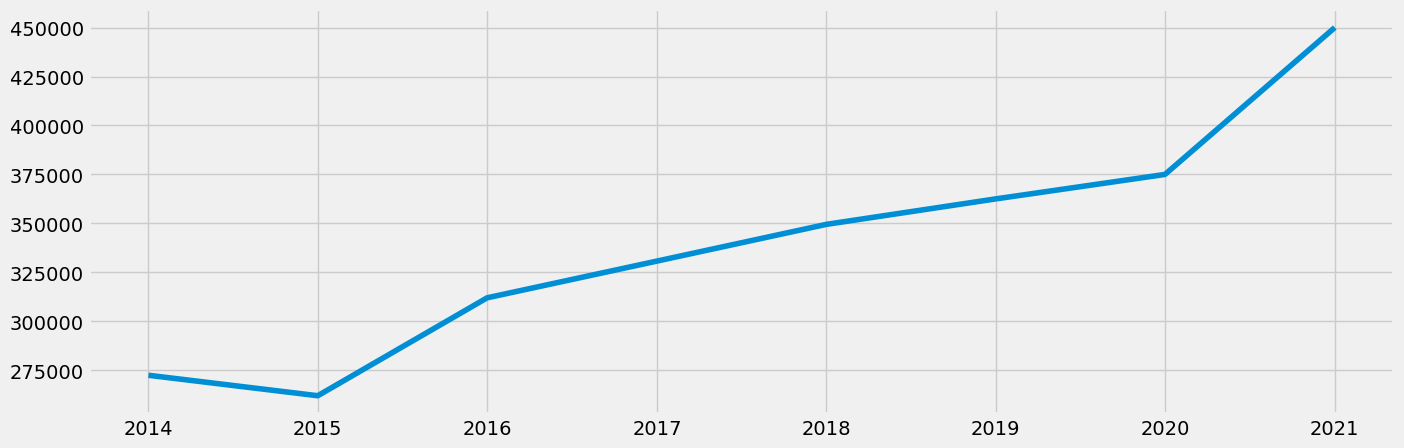

In [93]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_fix)

5) Create a line chart of your data.
6) Decompose the data’s components.
7) Analyze the results from the plot in a markdown cell.

### Decomposition

In [94]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_fix, model='additive')

In [95]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

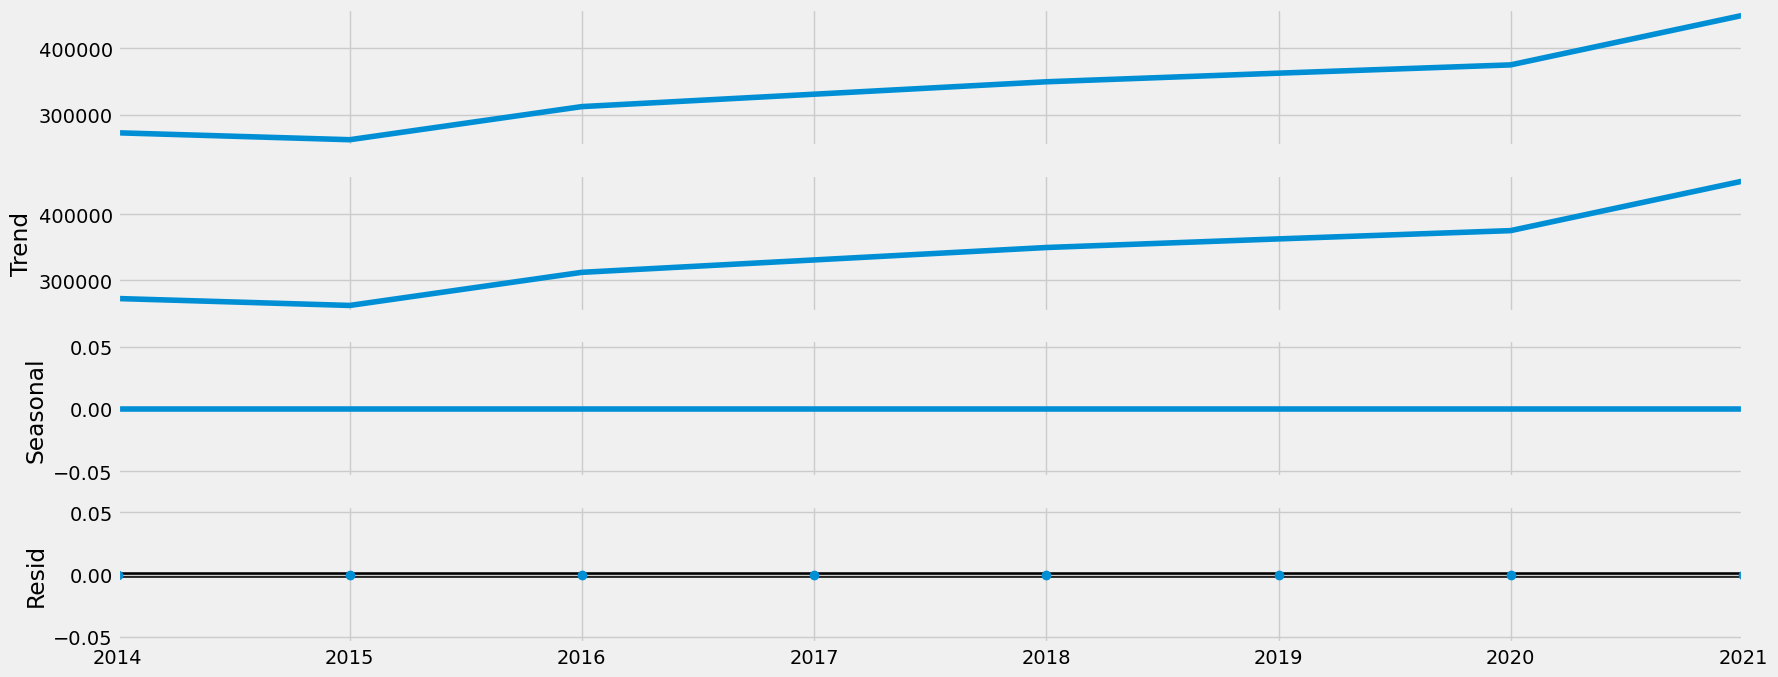

In [96]:
# Plot the separate components

decomposition.plot()
plt.show()

8) Conduct a Dickey-Fuller test to check for stationarity.
9) Interpret the results in a markdown cell and reference your null hypothesis.
10) If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
11) If your data still isn’t stationary, perform another round of differencing and repeat step 6.
12) Check your data’s autocorrelations.

In [97]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_fix['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 4.088420
p-value                        1.000000
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


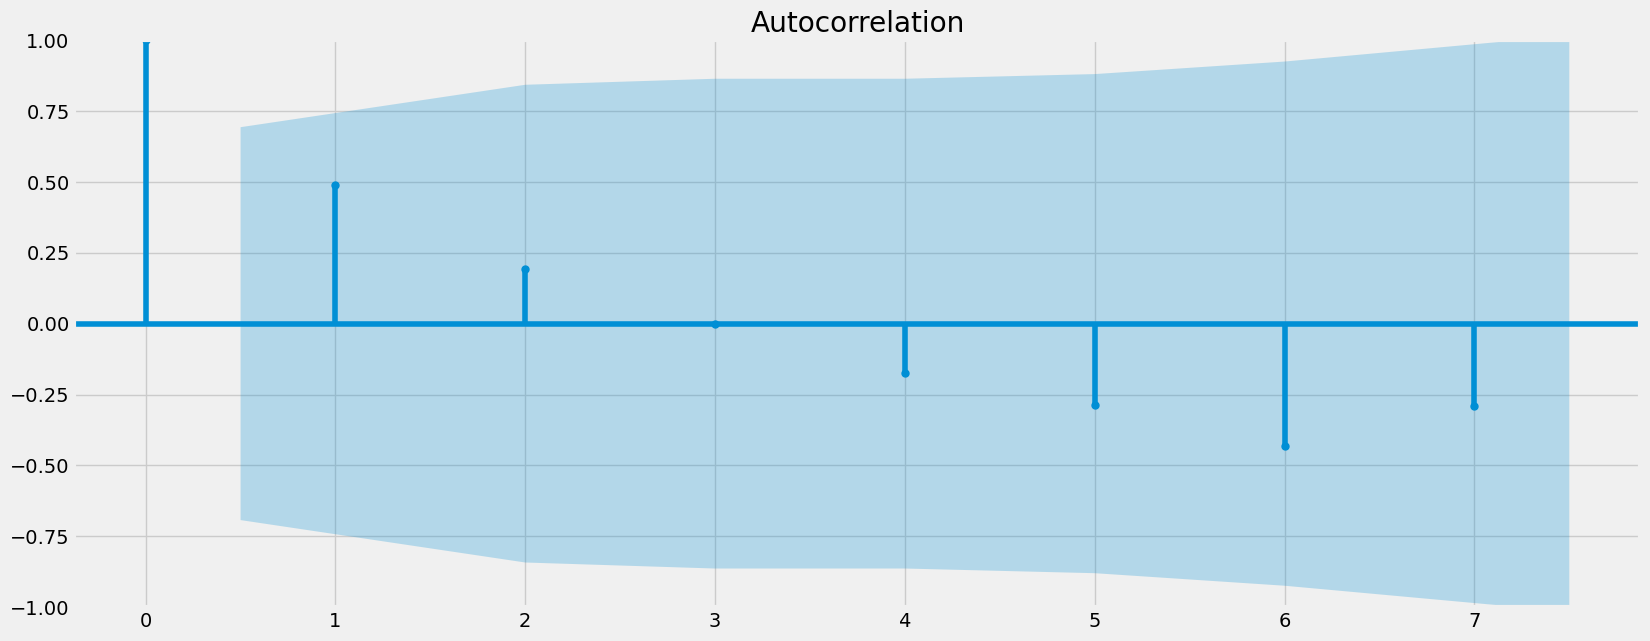

In [98]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_fix)
plt.show()

### My test statistic is significantly larger than all critical values, so I can't reject the null. This means that my data is non-stationary. However, the autocorrelation plot suggests that this may not be accurate. Because there are so few data points, and there appears to be a visible trend, we'll choose to follow the dickey-fuller results.

## Stationarizing the data with data_diff = data - data.shift(1)

In [99]:
data_dif = df_fix - df_fix.shift(1)

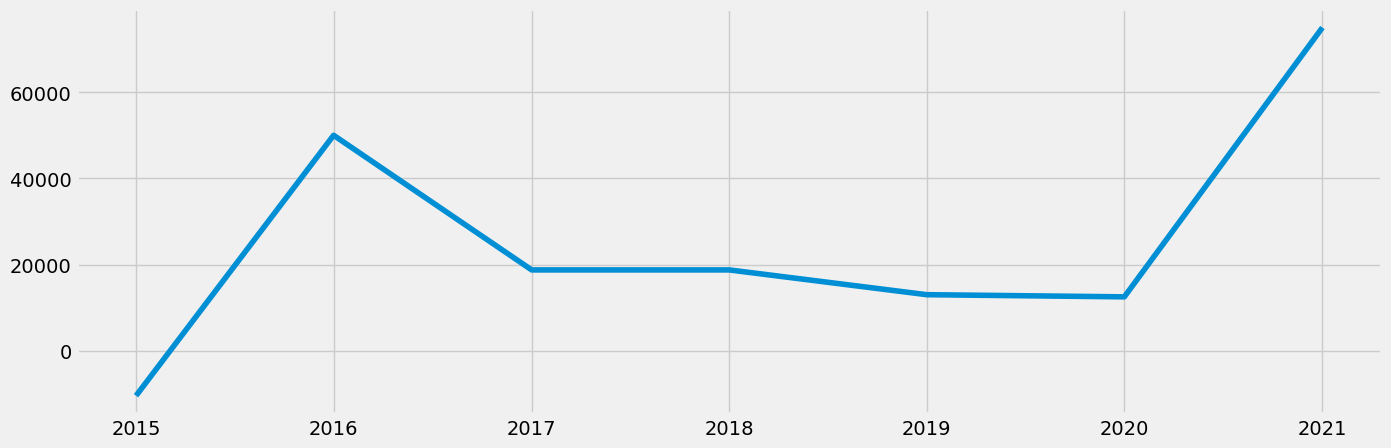

In [100]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_dif)

In [102]:
data_dif.head(10)

,Value
Year,
2014-01-01,NaN
2015-01-01,-10449.0
2016-01-01,50000.0
2017-01-01,18750.0
2018-01-01,18750.0
2019-01-01,13000.0
2020-01-01,12500.0
2021-01-01,75000.0


In [106]:
### dropping nan row
data_dif.drop(labels = "2014-01-01", axis = 0)

,Value
Year,
2015-01-01,-10449.0
2016-01-01,50000.0
2017-01-01,18750.0
2018-01-01,18750.0
2019-01-01,13000.0
2020-01-01,12500.0
2021-01-01,75000.0


In [108]:
### dropping nan row
data_dif.drop(labels = "2015-01-01", axis = 0)

,Value
Year,
2014-01-01,NaN
2016-01-01,50000.0
2017-01-01,18750.0
2018-01-01,18750.0
2019-01-01,13000.0
2020-01-01,12500.0
2021-01-01,75000.0


In [110]:
### dropping nan row
data_dif.drop(labels = ["2015-01-01","2014-01-01"], axis = 0, inplace = True)

In [111]:
data_dif.head(10)

,Value
Year,
2016-01-01,50000.0
2017-01-01,18750.0
2018-01-01,18750.0
2019-01-01,13000.0
2020-01-01,12500.0
2021-01-01,75000.0


In [112]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_dif['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.588548
p-value                        0.489344
Number of Lags Used            0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


### Have to conduct another round of differencing, as the test stat is still > crits

In [113]:
df_dif2 = data_dif - data_dif.shift(1)

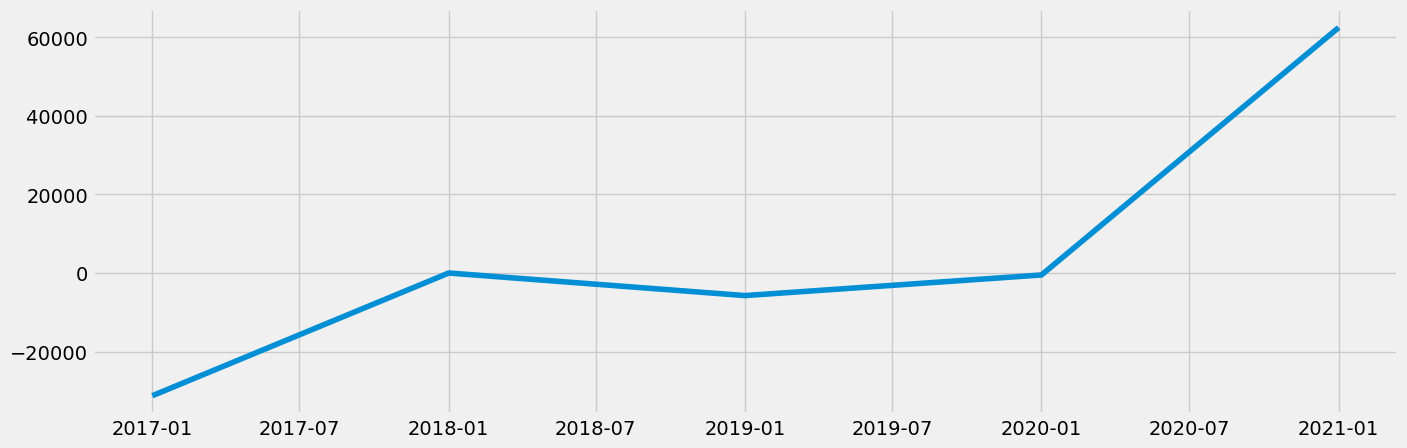

In [114]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_dif2)

### If I keep differencing, there will be no more data.

### The first differencing may be the most useful.